In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

DataSet

In [ ]:
X = np.random.gumbel(50,10,1000).reshape(-1,1)
y = X * 70000
y = y + np.random.normal(0,800000,(1000,1))

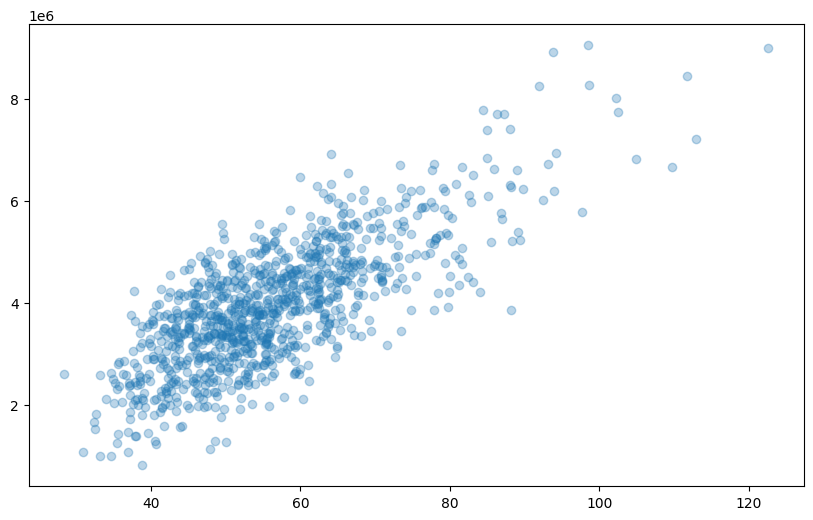

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(X,y,'o', alpha = 0.3);

In [ ]:
TRAIN_TEST = 0.8

In [ ]:
train_numb = round(X.shape[0] * TRAIN_TEST)
X_train = X[:train_numb]
y_train = y[:train_numb]
X_test = X[train_numb:]
y_test = y[train_numb:]

In [ ]:
class SOLUTION:

  def __init__(self, a, n_epoh):
    self.a = a
    self.n_epoh = n_epoh

  def MSE(self, y, y_pred):
    return np.sum(np.square(y - y_pred)) / y.shape[0]

  def d_w(self, y_pred, y, x):
    return 2 * np.sum((y_pred - y) * x) / y.shape[0]

  def d_b(self, y_pred, y):
    return 2 * np.sum((y_pred - y)) / y.shape[0]

  def fit(self, X, y):
    self.w = 0
    self.b = 0
    for i in range(self.n_epoh):
      self.w = self.w - self.a * self.d_w(self.predict(X), y, X)
      self.b = self.b - self.a * self.d_b(self.predict(X), y)
      print(f"MSE: {self.MSE(y, self.predict(X))}")

  def predict(self, X):
    return self.w * X + self.b

In [ ]:
model = SOLUTION(a = 10e-5, n_epoh = 20)
model.fit(X_train, y_train)

MSE: 2533454980177.5117
MSE: 859695716056.9463
MSE: 661815219641.8086
MSE: 638420628244.2954
MSE: 635654727707.0914
MSE: 635327692324.6835
MSE: 635289005564.674
MSE: 635284413640.362
MSE: 635283854244.6787
MSE: 635283772169.0479
MSE: 635283746722.3916
MSE: 635283728038.924
MSE: 635283710178.6936
MSE: 635283692424.1243
MSE: 635283674685.1101
MSE: 635283656949.187
MSE: 635283639214.258
MSE: 635283621479.8611
MSE: 635283603745.868
MSE: 635283586012.2382


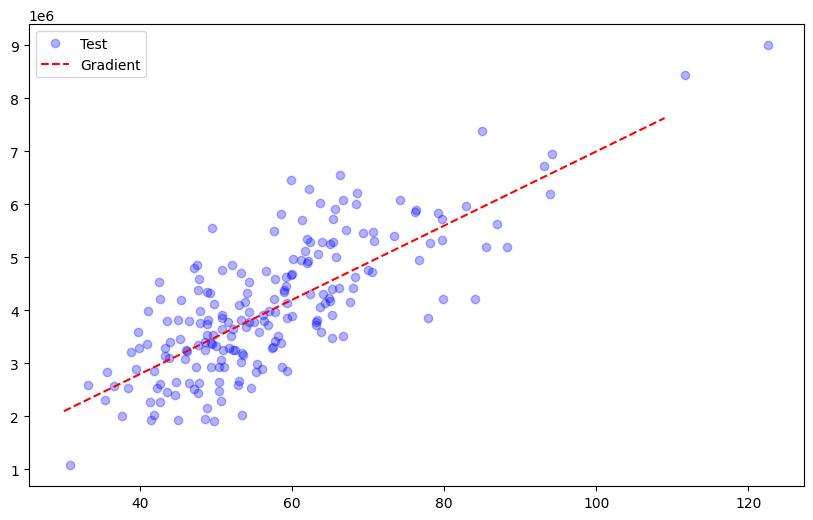

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(X_test, y_test, 'bo', label = 'Test', alpha = 0.3)

xx = np.arange(30, 110).reshape(-1, 1)
plt.plot(xx, model.predict(xx), 'r--', label = 'Gradient')
plt.legend()
plt.show()

МНК


In [ ]:
def SEE(X, y):
    X_b = np.hstack([np.ones((X.shape[0], 1)), X])
    w = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
    return w

In [ ]:
model = SOLUTION(a=10e-5, n_epoh=20)
model.fit(X_train, y_train)
w = SEE(X_train, y_train)
print(f"МНК коэффициенты: w = {w[1][0]}, b = {w[0][0]}")

MSE: 2533454980177.5117
MSE: 859695716056.9463
MSE: 661815219641.8086
MSE: 638420628244.2954
MSE: 635654727707.0914
MSE: 635327692324.6835
MSE: 635289005564.674
MSE: 635284413640.362
MSE: 635283854244.6787
MSE: 635283772169.0479
MSE: 635283746722.3916
MSE: 635283728038.924
MSE: 635283710178.6936
MSE: 635283692424.1243
MSE: 635283674685.1101
MSE: 635283656949.187
MSE: 635283639214.258
MSE: 635283621479.8611
MSE: 635283603745.868
MSE: 635283586012.2382
МНК коэффициенты: w = 72299.12477478175, b = -137386.0671370754


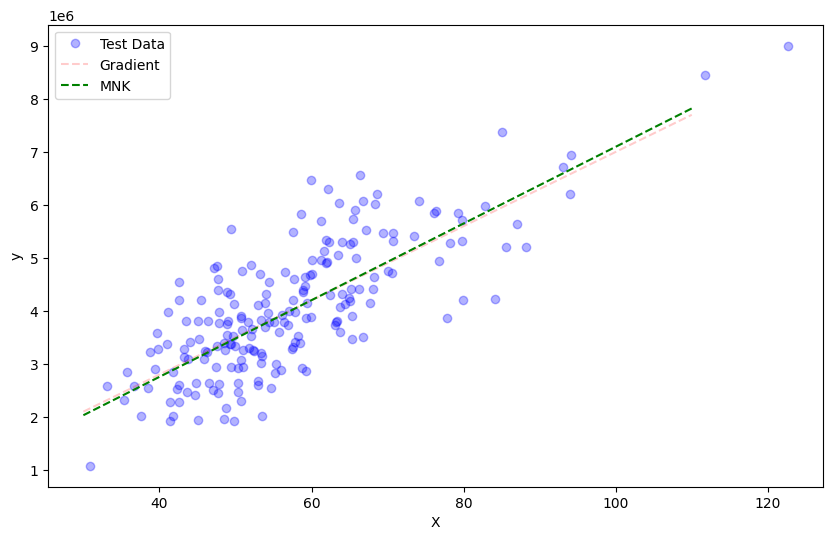

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(X_test, y_test, 'bo', label='Test Data', alpha=0.3)

xx = np.linspace(30, 110, 100).reshape(-1, 1)
plt.plot(xx, model.predict(xx), 'r--', label = 'Gradient', alpha = 0.2)
plt.plot(xx, w[1] * xx + w[0], 'g--', label='MNK')

plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()